In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Data
data = pd.read_csv("..\Training_Model\Switzerland Database\house_prices_switzerland.csv")

# Removendo as colunas 'ID' e 'Locality'
remove = ['ID', 'Locality']
data_treated = data.drop(remove, axis=1)

# Convertendo valores booleanos para 1 e 0
data_treated['Balcony'] = data_treated['Balcony'].replace({True: 1, False: 0})
data_treated = data_treated.dropna(subset=['Price'])

data_treated

O preço médio das casas é: $ 2249037.29 





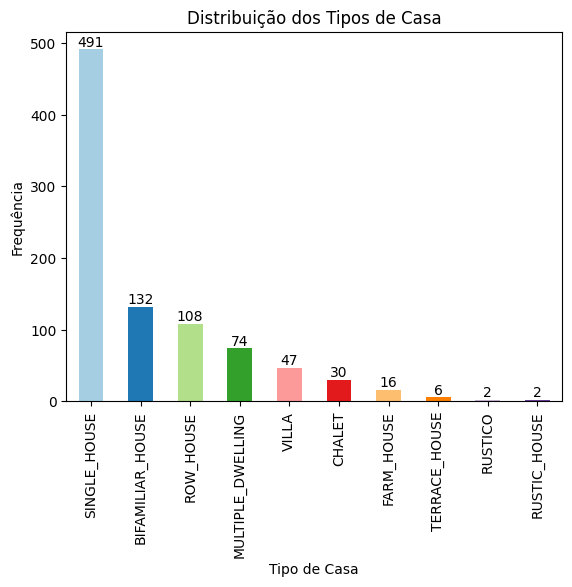

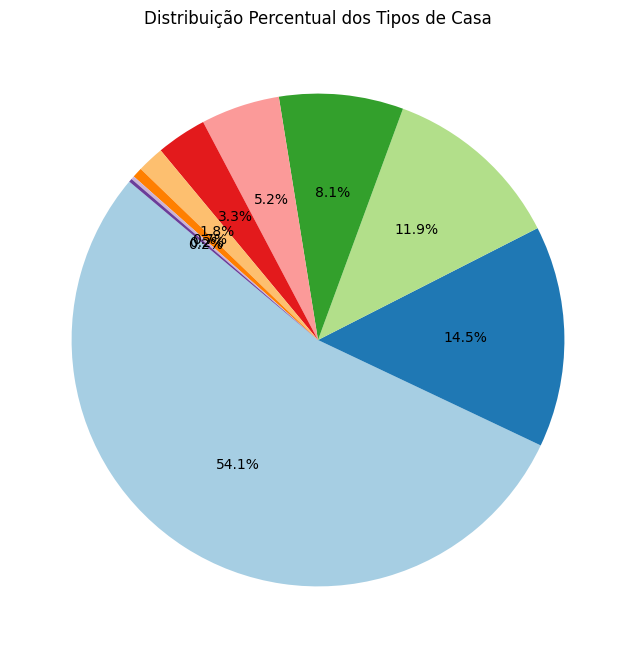

O número de casas a enda é:  908 

A quantidade de cidades que possuem casas a venda é:  651 

['Genestrerio' 'Vétroz' 'Glovelier' 'Balerna' 'Stabio' 'Arosio' 'Corban'
 'Rothenbrunnen' 'Biel/Bienne' 'Oftringen' 'Burgistein' 'Seelisberg'
 'Sion' 'Laufenburg' 'Abtwil SG' 'Egerkingen' 'Riken AG' 'Etzgen' 'Spiez'
 'Koppigen' 'Les Crosets' 'Bellmund' 'Claro' 'Aesch BL' 'Riederalp'
 'Zuzwil SG' 'Zullwil' 'Murgenthal' 'Farnern' 'Castagnola' 'Flühli LU'
 'Märstetten' 'Flawil' 'Sierre' 'Sevelen' 'Bellwald' 'Düdingen'
 'Allschwil' 'Hofstetten' 'Reinach BL' 'Reinach' 'Langenbruck'
 'Läufelfingen' 'Adligenswil' 'Arogno' 'Füllinsdorf' 'Corsier GE' 'Sulgen'
 'Mendrisio' 'Villars-Sainte-Croix' 'Steinhausen' 'Beromünster' 'Kriens'
 'Chambésy' 'Morgins' 'Schluein' 'Nunningen' 'Grund b. Gstaad' 'Eschenz'
 'Glarus' 'Glarus Nord' 'Novazzano' 'Eglisau' 'Vogorno' 'Givrins'
 'Gelterkinden' 'Pfeffingen' 'Mülligen' 'Weggis' 'Mühlau' 'Winterthur'
 'Leutwil' 'Obfelden' 'Saxon' 'Vernier' 'Château-d’Œx' 'Oberwil b

In [ ]:
#Calculating the mean price of houses
house_Price_Mean = data_treated['Price'].mean()
print("O preço médio das casas é: $", house_Price_Mean.round(2), '\n')

#Type of propryeties distribuition

house_counts = data['HouseType'].value_counts()

# Define a list of cores (one color for each bar)
colors = plt.cm.Paired(range(len(house_counts)))

# Create the bar chart
ax = house_counts.plot(kind='bar', color=colors)

# Add title and labels to axes
plt.title('Distribuição dos Tipos de Casa')
plt.xlabel('Tipo de Casa')
plt.ylabel('Frequência')

# Add bar values
for i, value in enumerate(house_counts):
    plt.text(i, value + 0.05, str(value), ha='center', va='bottom')

# plt.show()

print('\n')

# Calculating the percentage
house_percentages = house_counts / house_counts.sum() * 100

# Set the colors for each segment
colors = plt.cm.Paired(range(len(house_counts)))

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(house_percentages, colors=colors, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Distribuição Percentual dos Tipos de Casa')

# Add caption
# plt.legend(wedges, house_counts.index, title="Tipos de Casa", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


# Number of houses listed for sale
data = data.dropna(subset=['Price'])
data_Houses_ForSale = pd.DataFrame()

data_Houses_ForSale[['Price', 'Locality', 'HouseType']] = data[['Price', 'Locality', 'HouseType']]

print("O número de casas a enda é: ", data_Houses_ForSale['Price'].count(), '\n')
print("A quantidade de cidades que possuem casas a venda é: ", data_Houses_ForSale['Locality'].value_counts().count(), '\n')

cites_Houses_ForSale = data_Houses_ForSale['Locality'].unique()
print(cites_Houses_ForSale)
